# WORLD HAPPINESS EXPLORATORY DATA ANALYSIS

* Bivariate data analysis
* Multivariate data analysis
* Seaborn library visualization techniques: bar, box, kde, swarm, heatmap, clustermap
* Plotly library visualization techniques: animated plot and world map

## Introduction
* The World Happiness Report is a landmark survey of the state of global happiness.
* The report continuous to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.
* Leading experts across fields - economics, psychology, surevey analysis, national statistics, health, public policy and more - describe how measurements of well-being can be used effectively to access the progress of nations.
* The reports view the state of happiness in the world today show how the new science of happiness explains personal and national variations in happiness.

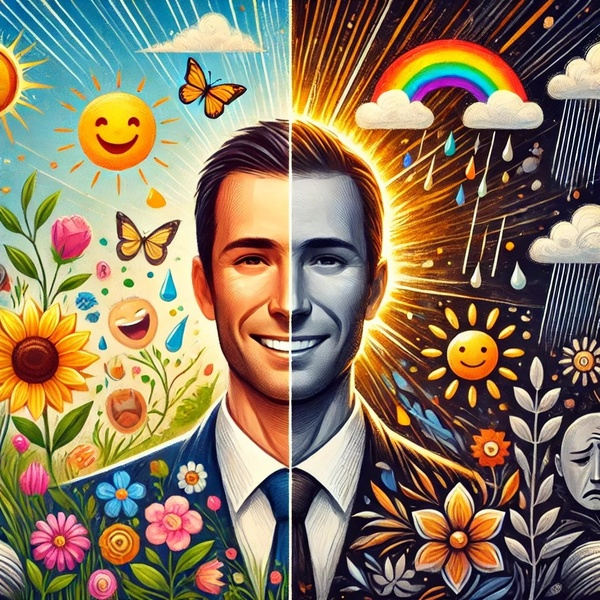

## Analysis Content
1. [Python libraries](#1)
2. [Data Content](#2)
3. [Read and Analyse Data](#3)
4. [Data Distributions in 2021](#4)
5. [Happiest and Unhappiest Countries in 2021](#5)
6. [Ladder Score Distribution by Regional Indicator](#6)
7. [Ladder Score Distribution by Countries in Map Wiev](#7)
8. [Most Generous and Most Unngenerous Countries in 2021](#8)
9. [Generous Distribution by Countries in Map Wiev](#9)
10. [Generous Distribution by Regional Indicator in 2021](#10)
11. [Relationship Between Happiness and Income](#11)
12. [Relationship Between Happiness and Freedom](#12)
13. [Relationship Between Happiness and Corruption](#13)
14. [Relationship Between Features](#14)

<a id='1'></a>
## Python Libraries
* In this section, we import used libraries during this notebook.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import seaborn as sns
sns.set_style("whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-v0_8-notebook")
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv
/kaggle/input/world-population-19602018/population_total_long.csv
/kaggle/input/world-population-19602018/pop_worldometer_data.csv
/kaggle/input/world-population-19602018/population_above_age_65_percentage_long.csv
/kaggle/input/world-population-19602018/population_female_percentage_long.csv
/kaggle/input/world-population-19602018/population_below_age_14_percentage_long.csv
/kaggle/input/world-population-19602018/population_density_long.csv


<a id='2'></a>,
## Data Content
* The happiness scores and ranking use data from the Gallup World Poll.
    *Gallup World Poll: In  2005, Gallup began its World Poll, which continually surveys citizen im 160 countries, representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global quesitons as well as region-specific items.
* The columns following the happiness score estimate the extent to which each of six factors - economic production, social support, life expectancy, freedom, absense of corruption, and generosity - contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world's lowest national averages for each of the six factors.
* **Ladder score:** Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
* **Logged GDP per capita:** The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
* **Social support:** Social support refers to assistance or support provided by members of social networks to an individual.
* **Healthy life expectancy:** Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
* **Freedom to make life choices:** Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
* **Generosity:** Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
* **Perceptions of corruption:** The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
* **Ladder score in Dystopia:** It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia
* **World Happiness Report Official Website:** https://worldhappiness.report/ed/2021/



<a id='3'></a>
## Read and Analyse Data

In [2]:
#read data
df=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

In [3]:
#show first 5 row of data
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
#describe basic statistic of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [5]:
#information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [6]:
#read data
df_2021= pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")

In [7]:
#show first 5 row of data
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [8]:
#describe basic statistic of data
df_2021.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,0.058752,0.022001,0.026,0.043,0.054,0.070,0.173
upperwhisker,149.0,5.648007,1.054330,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,5.417631,1.094879,2.449,4.706,5.413,6.128,7.780
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


In [9]:
#information about data 
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

<a id='4'></a>
## Data Distributions in 2021
* Unique Countries
* Count Regional Indicator
* Distribution of Remaining Features

In [10]:
df_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [11]:
#unique countries
df_2021["Country name"].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

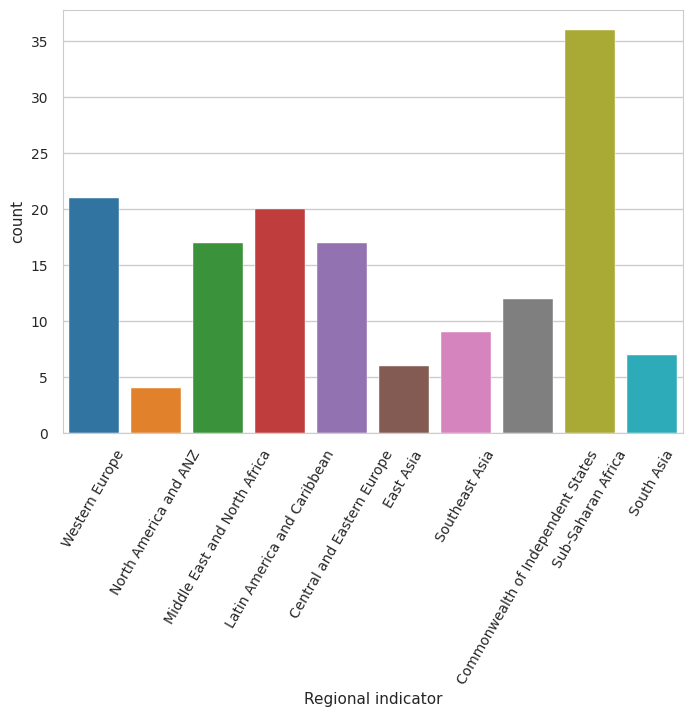

In [12]:
#count regional indicator
sns.countplot(x='Regional indicator', data=df_2021)
plt.xticks(rotation=60)
plt.show()

* The box plot may not be very descriptive because the mean values ​​of some features are very far apart. For this reason, the graphs below were created by grouping those whose averages were close to each other.

<Axes: >

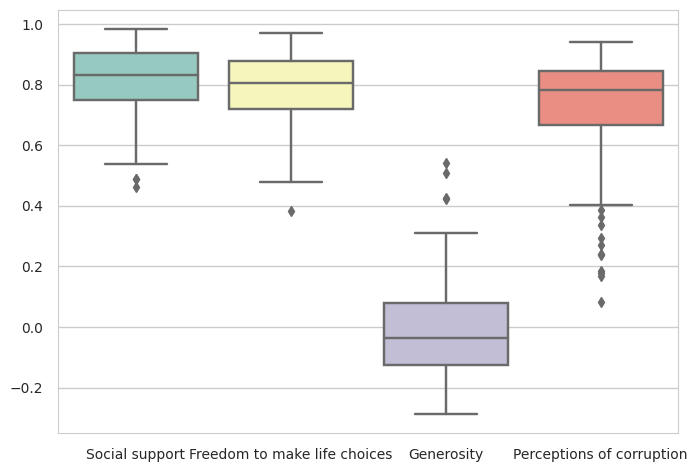

In [13]:
#distribution of feature set 1
list_features=["Social support","Freedom to make life choices","Generosity","Perceptions of corruption"]
sns.boxplot(data=df_2021.loc[:,list_features], orient="v", palette="Set3")

* According to the graph, the feature with the most outlier value among these features is "perception of corruption". This shows that there is much more corruption in some countries than the world average.
* When the generosity feature was examined, it was observed that some countries were above the world average.

<Axes: >

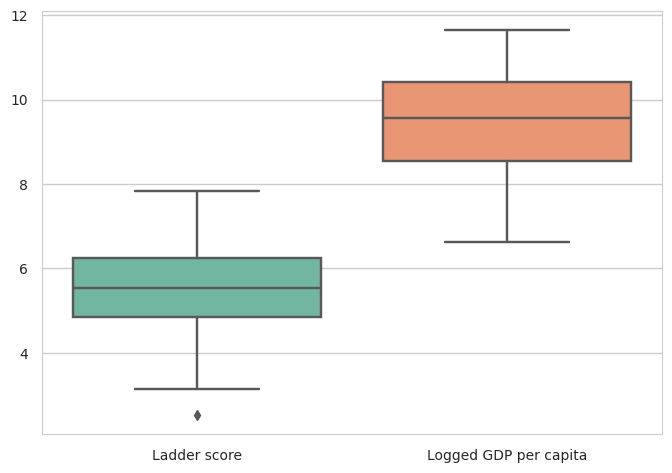

In [14]:
# distribution of feature set 2
list_features=["Ladder score", "Logged GDP per capita"]
sns.boxplot(data=df_2021.loc[:,list_features], orient="v", palette="Set2")

* This chart shows that there are countries that are much unhappy than the world average.

<Axes: >

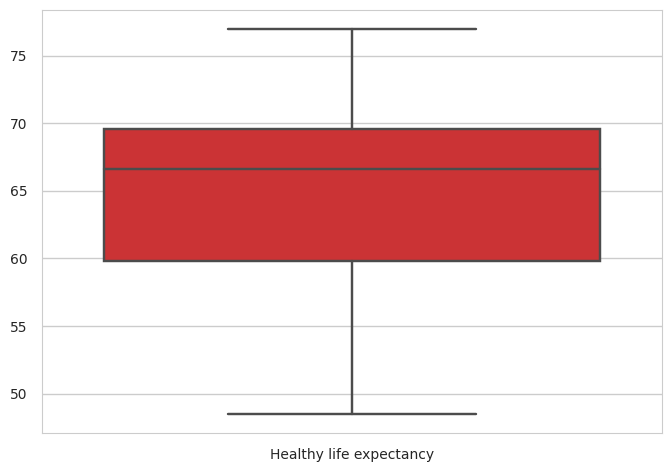

In [15]:
# distribution of feature set 3
list_features=["Healthy life expectancy"]
sns.boxplot(data=df_2021.loc[:,list_features], orient="v", palette="Set1")

* This graph shows that there is no any outlier in the feature that is "Healthy life expectancy".

<a id='5'></a>,
## Happiest and Unhappiest Countries in 2021

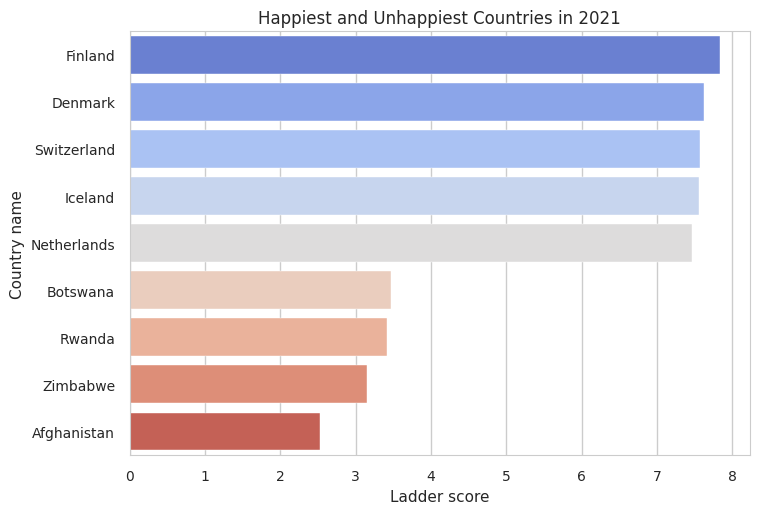

In [16]:
df_2021_happiest_unhappiest=df_2021[(df_2021.loc[:,"Ladder score"]>7.4)|(df_2021.loc[:,"Ladder score"]<3.5)]
sns.barplot(x="Ladder score", y="Country name", data=df_2021_happiest_unhappiest,palette="coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()

* At first glance, Western European countries appear to be happier countries. A more accurate conclusion can be made after looking at the distribution of happiness by region.

<a id='6'></a>
## Ladder Score Distribution by Regional Indicator

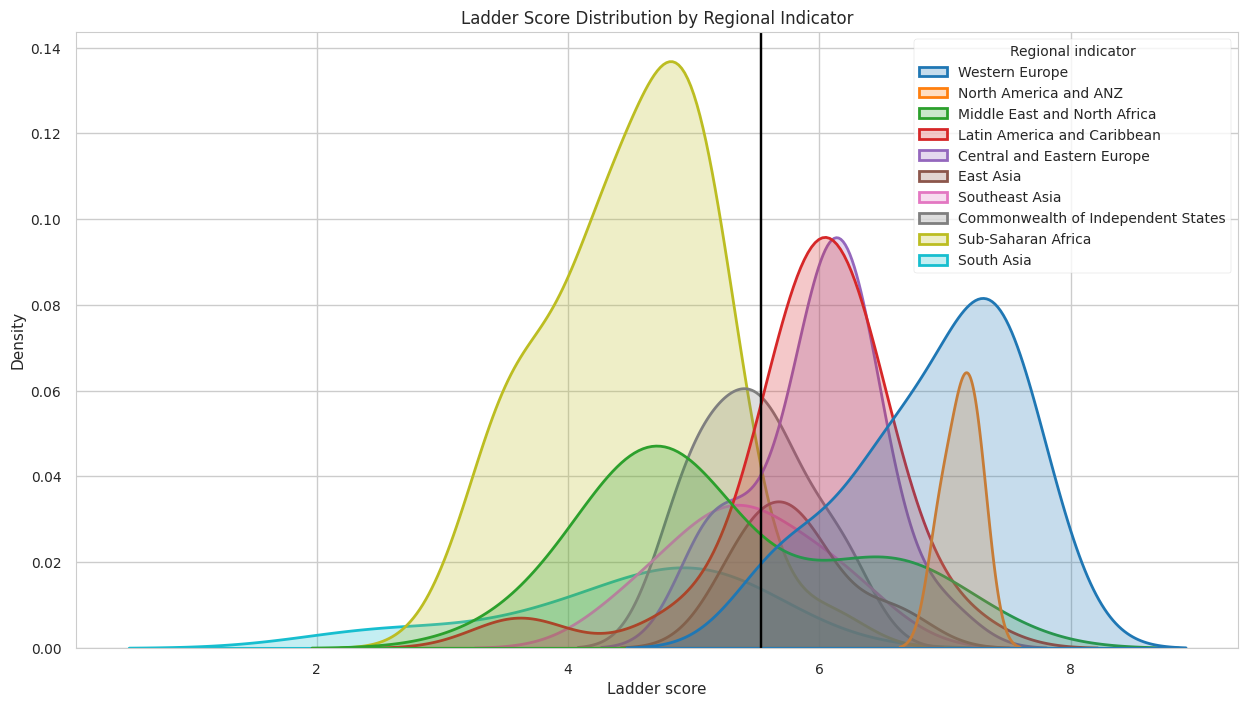

In [17]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df_2021,x="Ladder score",hue="Regional indicator",fill=True,linewidth=2)
plt.axvline(df_2021["Ladder score"].mean(), c="black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

* This graph clearly shows that countries in Western Europe are the happiest countries and countries in South Asia are the unhappiest.
* It has been observed that the average happiness of African countries and South Asian countries is below the world average.
* According to the graph, it was seen that the standard deviation of South Asian countries was high, while the standard deviation of North American and ANZ countries was low.

<a id='7'></a>
## Ladder Score Distribution by Countries in Map Wiev

In [18]:
fig=px.choropleth(df.sort_values("year"),
             locations="Country name",
             color= "Life Ladder",
             locationmode="country names",
             animation_frame="year")
fig.update_layout(title="Life Ladder Comparison by Countries")
fig.show()

* In the interactive map above, the happiness rates of countries can be observed by year.

<a id='8'></a>
## Most Generous and Most Unngenerous Countries in 2021

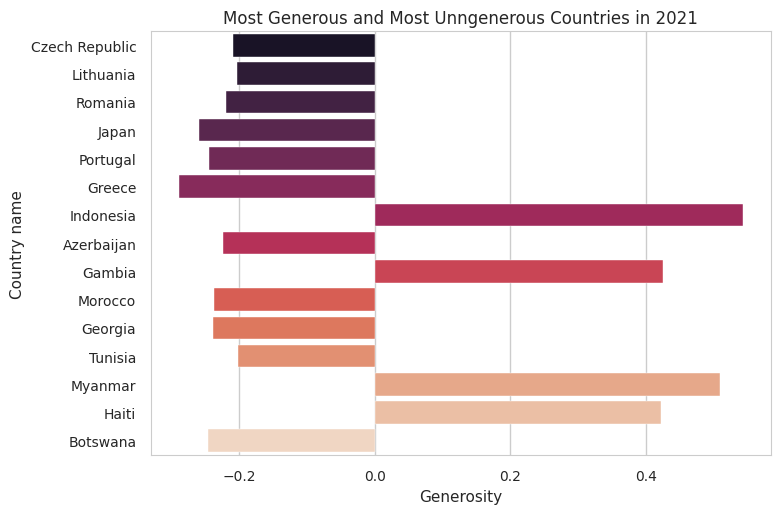

In [19]:
df_2021_g=df_2021[(df_2021.loc[:,"Generosity"]>0.4) | (df_2021.loc[:,"Generosity"]<-0.2)]
sns.barplot(x="Generosity", y="Country name",data=df_2021_g, palette="rocket")
plt.title("Most Generous and Most Unngenerous Countries in 2021")
plt.show()

* According to the graph, it was observed that the most generous country was Indonesia and the least generous country was Greece.

<a id='9'></a>
## Generous Distribution by Countries in Map Wiev

In [20]:
fig=px.choropleth(df.sort_values("year"),
                 locations="Country name",
                 color="Generosity",
                 locationmode="country names",
                 animation_frame="year")
fig.update_layout(title="Generosity Comparison by Countries")
fig.show()
                            

* The generosity rates of countries by year can be observed in the interactive map above.

<a id='10'></a>
## Generous Distribution by Regional Indicator in 2021

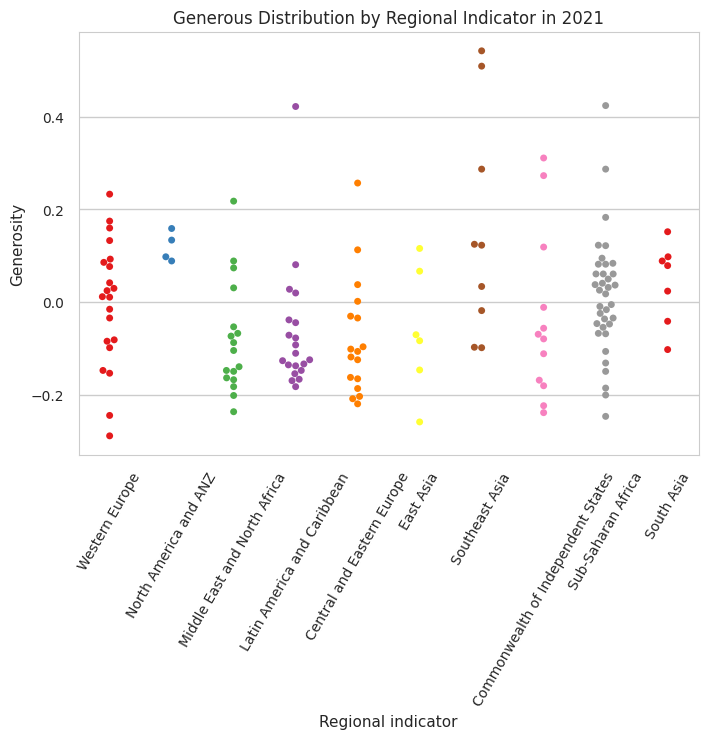

In [21]:
sns.swarmplot(x="Regional indicator", y="Generosity", data=df_2021, palette="Set1")
plt.xticks(rotation=60)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show()

* According to the chart, the most generous countries are in South East Asia. The most ungenerous countries are in Western Europe. In addition, the region with the lowest standard deviation is North America and the region with the largest standard deviation is South Asia.

<a id='11'></a>
## Relationship Between Happiness and Income

In [22]:
pop = pd.read_csv("/kaggle/input/world-population-19602018/population_total_long.csv")
pop.head() 

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [23]:
country_continent={}
for i in range(len(df_2021)):
    country_continent[df_2021["Country name"][i]]=df_2021["Regional indicator"][i]
all_countries=df["Country name"].value_counts().reset_index()["Country name"].tolist()
all_countries_2021=df_2021["Country name"].value_counts().reset_index()["Country name"].tolist()

for x in all_countries:
    if x not in all_countries_2021:
        print(x)

Congo (Kinshasa)
Syria
Trinidad and Tobago
Sudan
Qatar
Central African Republic
Somaliland region
Djibouti
South Sudan
Angola
Bhutan
Somalia
Belize
Suriname
Cuba
Oman
Guyana


In [24]:
region = []
for i in range(len(df)):
    if df['Country name'][i] == 'Angola':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Belize':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Congo (Kinshasa)':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Syria':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Trinidad and Tobago':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Cuba':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Qatar':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Sudan':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Central African Republic':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Djibouti':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Somaliland region':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'South Sudan':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Somalia':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Oman':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Bhutan':
        region.append("South Asia")
    elif df['Country name'][i] == 'Suriname':
        region.append("Latin America and Caribbean")
    else:
        region.append(country_continent[df['Country name'][i]])
        
df["region"] = region

In [25]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [26]:
all_countries=df["Country name"].value_counts().reset_index()["Country name"].tolist()
all_countries_pop=pop["Country Name"].value_counts().reset_index()["Country Name"].tolist()

del_cou=[]
for x in all_countries:
    if x not in all_countries_pop:
        del_cou.append(x)
del_cou        


['Egypt',
 'South Korea',
 'Kyrgyzstan',
 'Russia',
 'Venezuela',
 'Palestinian Territories',
 'Taiwan Province of China',
 'Iran',
 'Yemen',
 'Slovakia',
 'Hong Kong S.A.R. of China',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Laos',
 'Congo (Kinshasa)',
 'Syria',
 'North Cyprus',
 'Somaliland region',
 'Swaziland',
 'Gambia']

In [27]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'region'],
      dtype='object')

In [28]:
pop_df=df[['Log GDP per capita','Country name', 'year', 'Life Ladder','Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity','Perceptions of corruption','region']].copy()
pop_df.head()

,Log GDP per capita,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,7.370,Afghanistan,2008,3.724,0.451,50.80,0.718,0.168,0.882,South Asia
1,7.540,Afghanistan,2009,4.402,0.552,51.20,0.679,0.190,0.850,South Asia
2,7.647,Afghanistan,2010,4.758,0.539,51.60,0.600,0.121,0.707,South Asia
3,7.620,Afghanistan,2011,3.832,0.521,51.92,0.496,0.162,0.731,South Asia
4,7.705,Afghanistan,2012,3.783,0.521,52.24,0.531,0.236,0.776,South Asia


In [29]:
pop_df=pop_df[~pop_df["Country name"].isin(del_cou)]
pop_df=pop_df[~pop_df.year.isin([2005,2006,2007,2018,2019,2020,2021])]
pop_dict={x:{} for x in range(2008,2018)}
for i in range(len(pop)):
    if(pop["Year"][i] in range(2008,2018)):
        pop_dict[pop["Year"][i]][pop["Country Name"][i]]=pop["Count"][i]

In [30]:
pop_dict

{2008: {'Aruba': 101358,
  'Afghanistan': 27722276,
  'Angola': 21695634,
  'Albania': 2947314,
  'Andorra': 83862,
  'United Arab Emirates': 7089487,
  'Argentina': 40080160,
  'Armenia': 2907618,
  'American Samoa': 57492,
  'Antigua and Barbuda': 85397,
  'Australia': 21249200,
  'Austria': 8321496,
  'Azerbaijan': 8763400,
  'Burundi': 8126102,
  'Belgium': 10709973,
  'Benin': 8696921,
  'Burkina Faso': 14689725,
  'Bangladesh': 144304167,
  'Bulgaria': 7492561,
  'Bahrain': 1114641,
  'Bahamas, The': 343681,
  'Bosnia and Herzegovina': 3754271,
  'Belarus': 9527985,
  'Belize': 306823,
  'Bermuda': 65273,
  'Bolivia': 9721454,
  'Brazil': 192030362,
  'Barbados': 279946,
  'Brunei Darussalam': 379421,
  'Bhutan': 671613,
  'Botswana': 1915639,
  'Central African Republic': 4273366,
  'Canada': 33247118,
  'Switzerland': 7647675,
  'Channel Islands': 156433,
  'Chile': 16708258,
  'China': 1324655000,
  "Cote d'Ivoire": 19605569,
  'Cameroon': 19252666,
  'Congo, Dem. Rep.': 60411

In [31]:
population=[]
for i in pop_df.index:
    population.append(pop_dict[pop_df["year"][i]][pop_df["Country name"][i]])
pop_df["population"]=population

In [32]:
pop_df.head()

,Log GDP per capita,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,region,population
0,7.370,Afghanistan,2008,3.724,0.451,50.80,0.718,0.168,0.882,South Asia,27722276
1,7.540,Afghanistan,2009,4.402,0.552,51.20,0.679,0.190,0.850,South Asia,28394813
2,7.647,Afghanistan,2010,4.758,0.539,51.60,0.600,0.121,0.707,South Asia,29185507
3,7.620,Afghanistan,2011,3.832,0.521,51.92,0.496,0.162,0.731,South Asia,30117413
4,7.705,Afghanistan,2012,3.783,0.521,52.24,0.531,0.236,0.776,South Asia,31161376


In [33]:
fig=px.scatter(pop_df,
              x="Log GDP per capita",
              y="Life Ladder",
              animation_frame="year",
              animation_group="Country name",
              size="population",
              template="plotly_white",
              color="region",
              hover_name="Country name",
              size_max=60)
fig.update_layout(title="Life ladder and log GDP per capita comparison by countries via regions for each year")
fig.show()

<a id='12'></a>
## Relationship Between Happiness and Freedom

In [34]:
fig=px.scatter(pop_df,
              x="Freedom to make life choices",
              y="Life Ladder",
              animation_frame="year",
              animation_group="Country name",
              size="population",
              template="plotly_dark",
              color="region",
              hover_name="Country name",
              size_max=60)
fig.update_layout(title="Life ladder and freedom comparison by countries via regions for each year")
fig.show()

<a id='13'></a>
## Relationship Between Happiness and Corruption

In [35]:
fig=px.scatter(pop_df,
              x="Perceptions of corruption",
              y="Life Ladder",
              animation_frame="year",
              animation_group="Country name",
              size="population",
              color="region",
              hover_name="Country name",
              size_max=60)
fig.update_layout(title="Life ladder and corruption comparison by countries via regions for each year")
fig.show()

<a id='14'></a>
## Relationship Between Features

In [36]:
#choose numerical data
numeric_df = df.select_dtypes(include=[np.number]).copy()

In [37]:
numeric_df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.035515,0.078246,-0.010093,0.164059,0.222151,-0.043422,-0.081478,-0.003245,0.196869
Life Ladder,0.035515,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.078246,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,-0.010093,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.164059,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.222151,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,-0.043422,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.081478,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,-0.003245,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,0.196869,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


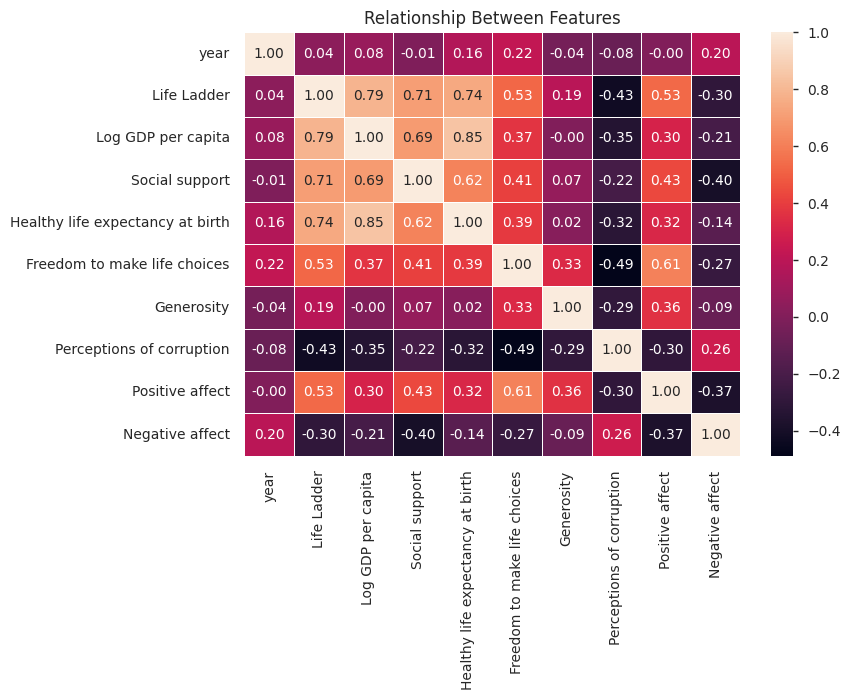

In [38]:
sns.heatmap(numeric_df.corr(),annot=True,fmt=".2f",linewidth=.7)
plt.title("Relationship Between Features")
plt.show()

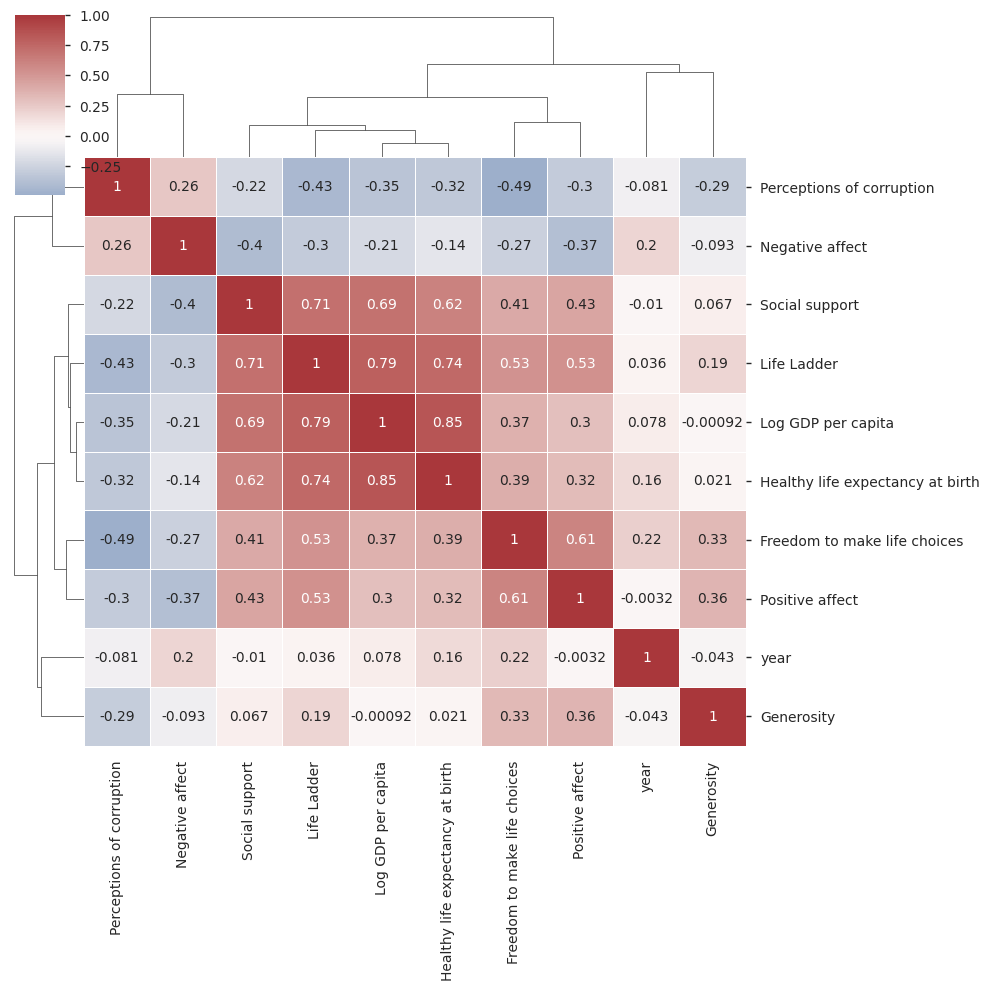

In [39]:
sns.clustermap(numeric_df.corr(),center=0,cmap ="vlag",dendrogram_ratio=(0.1,0.2),annot=True,linewidth=0.7,figsize=(10,10))

* According to the correlation map, the two variables that are most correlated with each other are "Log GDP per capita" and "Healthy life expectancy at birth". There is a strong positive correlation between them.
* Additionally, the Life Ladder is strongly positively correlated with Log GDP per capita, social support, and healthy life expectancy at birth.